In [1]:
# Reload automatically when the file is changed.
%load_ext autoreload
%autoreload 2

In [2]:
TRAIN_MODEL = False
LOAD_EXISTING_MODEL = True
SAVE_TRAINED_MODEL = TRAIN_MODEL and False

# Version of the Model to use 
VERSION_TRANSFORMER = 'V3'

# Importing Modules

In [3]:
import os 
import sys
MODULES_PATH = f"../../Modules/Transformers/{VERSION_TRANSFORMER}"
MODELS_PATH = "../../Models"

sys.path.append(MODULES_PATH)
sys.path.append(MODELS_PATH)


from Preprocessing import *
from Dataloaders_Preprocessing import *
from Train_Transformer import *
from Transformers import *
from Post_Train import *
from Verifying_Invariance import *




# Importing Data

In [4]:
List_Data_Train = Load_Data('../../Data/atoms/train', '../../Data/energies/train.csv')
List_Data_Test= Load_Test_Data('../../Data/atoms/test')

In [5]:
Display_Molecule_From_Atom_List(List_Data_Train[0]['Atoms_List'],Energy=List_Data_Train[1]['Energy'], Width=800, Height=800, Background_Color='lightblue')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Loading the Datasets

In [6]:
if VERSION_TRANSFORMER == 'V3':

    Dataset_Train = MoleculeDataset_Invariance_V3(Data_List = List_Data_Train,
                                                Nb_Atoms_Max_In_Molecule=23, Return_Energies=True, transform=None)

    Dataset_Test = MoleculeDataset_Invariance_V3(Data_List = List_Data_Test,
                                                Nb_Atoms_Max_In_Molecule=23, Return_Energies=False, transform=None)
elif VERSION_TRANSFORMER == 'V2':
    Dataset_Train = MoleculeDataset_Invariance_V2(Data_List = List_Data_Train,
                                                Nb_Atoms_Max_In_Molecule=23, Return_Energies=True, transform=None)

    Dataset_Test = MoleculeDataset_Invariance_V2(Data_List = List_Data_Test,
                                                Nb_Atoms_Max_In_Molecule=23, Return_Energies=False, transform=None)
elif VERSION_TRANSFORMER == 'V1':
    Dataset_Train = MoleculeDataset_Transformer(Data_List = List_Data_Train,
                                                Nb_Atoms_Max_In_Molecule=23, Return_Energies=True, transform=None)

    Dataset_Test = MoleculeDataset_Transformer(Data_List = List_Data_Test,
                                                Nb_Atoms_Max_In_Molecule=23, Return_Energies=False, transform=None)

else :
    raise ValueError(f"Unknown version of the Transformer: {VERSION_TRANSFORMER}")

# Training the Model

## Defining the architecture

In [7]:
# Configuration des paramètres pour la classe Transformer
EMBEDDINGS_SIZE = 1024
NB_HEADS = 30
QUERY_SIZE = 512
KEY_SIZE = 512
VALUE_SIZE = 512
NB_HIDDEN_LAYERS_MLP_OUTPUT = 5
HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT = [512, 256, 128, 64, 32]
OUTPUT_SIZE = 1
ACTIVATION_NAME_OUTPUT = 'PReLU'
NB_ATTENTION_BLOCKS = 1
NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV = 5
HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV = [32, 64, 128, 256, 512]
ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV = 'PReLU'
NB_HIDDEN_LAYERS_MLP_ATTENTION_WO = 5
HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO = [64, 128, 256, 512, 1024]
ACTIVATION_NAME_MLP_ATTENTION_WO = 'PReLU'

# Affichage des paramètres pour vérification
print("Configuration des paramètres du Transformer :")
print(f"EMBEDDINGS_SIZE: {EMBEDDINGS_SIZE}")
print(f"NB_HEADS: {NB_HEADS}")
print(f"QUERY_SIZE: {QUERY_SIZE}")
print(f"KEY_SIZE: {KEY_SIZE}")
print(f"VALUE_SIZE: {VALUE_SIZE}")
print(f"NB_HIDDEN_LAYERS_MLP_OUTPUT: {NB_HIDDEN_LAYERS_MLP_OUTPUT}")
print(f"HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT: {HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT}")
print(f"ACTIVATION_NAME_OUTPUT: {ACTIVATION_NAME_OUTPUT}")
print(f"OUTPUT_SIZE: {OUTPUT_SIZE}")
print(f"NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV: {NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV}")
print(f"HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV: {HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV}")
print(f"ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV: {ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV}")
print(f"NB_HIDDEN_LAYERS_MLP_ATTENTION_WO: {NB_HIDDEN_LAYERS_MLP_ATTENTION_WO}")
print(f"HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO: {HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO}")
print(f"ACTIVATION_NAME_MLP_ATTENTION_WO: {ACTIVATION_NAME_MLP_ATTENTION_WO}")
print(f"NB_ATTENTION_BLOCKS: {NB_ATTENTION_BLOCKS}")

# Instanciation du modèle
import torch
Device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {Device}")

Model = Transformer(
    Embeddings_Size=EMBEDDINGS_SIZE,
    Nb_Heads=NB_HEADS,
    Query_Size=QUERY_SIZE,
    Key_Size=KEY_SIZE,
    Value_Size=VALUE_SIZE,
    Nb_Hidden_Layers_MLP_Output=NB_HIDDEN_LAYERS_MLP_OUTPUT,
    Hidden_Layers_Size_List_MLP_Output=HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT,
    Output_Size=OUTPUT_SIZE,
    Nb_Hidden_Layers_MLP_Attention_WQ_WK_WV=NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV,
    Hidden_Layers_Size_List_MLP_Attention_WQ_WK_WV=HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV,
    Activation_Name_MLP_Attention_WQ_WK_WV=ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV,
    Nb_Hidden_Layers_MLP_Attention_WO=NB_HIDDEN_LAYERS_MLP_ATTENTION_WO,
    Hidden_Layers_Size_List_MLP_Attention_WO=HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO,
    Activation_Name_MLP_Attention_WO=ACTIVATION_NAME_MLP_ATTENTION_WO,
    Nb_Attention_Blocks=NB_ATTENTION_BLOCKS,
    Activation_Name_Output=ACTIVATION_NAME_OUTPUT
)

Model.to(Device)
print("Modèle Transformer instancié avec succès.")

Configuration des paramètres du Transformer :
EMBEDDINGS_SIZE: 1024
NB_HEADS: 30
QUERY_SIZE: 512
KEY_SIZE: 512
VALUE_SIZE: 512
NB_HIDDEN_LAYERS_MLP_OUTPUT: 5
HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT: [512, 256, 128, 64, 32]
ACTIVATION_NAME_OUTPUT: PReLU
OUTPUT_SIZE: 1
NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV: 5
HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV: [32, 64, 128, 256, 512]
ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV: PReLU
NB_HIDDEN_LAYERS_MLP_ATTENTION_WO: 5
HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO: [64, 128, 256, 512, 1024]
ACTIVATION_NAME_MLP_ATTENTION_WO: PReLU
NB_ATTENTION_BLOCKS: 1
Using device: cuda
Modèle Transformer instancié avec succès.


In [8]:
# # Configuration des paramètres pour la classe Transformer
# EMBEDDINGS_SIZE = 512
# NB_HEADS = 30
# QUERY_SIZE = 256
# KEY_SIZE = 256
# VALUE_SIZE = 256
# NB_HIDDEN_LAYERS_MLP_OUTPUT = 5
# HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT = [256,128,64,32,16]
# OUTPUT_SIZE = 1
# ACTIVATION_NAME_OUTPUT = 'PReLU'
# NB_ATTENTION_BLOCKS = 2
# NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV = 5
# HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV = [32,64,128,256,512]
# ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV = 'PReLU'
# NB_HIDDEN_LAYERS_MLP_ATTENTION_WO = 3
# HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO = [512,1024,512]
# ACTIVATION_NAME_MLP_ATTENTION_WO = 'PReLU'

# # Affichage des paramètres pour vérification
# print("Configuration des paramètres du Transformer :")
# print(f"EMBEDDINGS_SIZE: {EMBEDDINGS_SIZE}")
# print(f"NB_HEADS: {NB_HEADS}")
# print(f"QUERY_SIZE: {QUERY_SIZE}")
# print(f"KEY_SIZE: {KEY_SIZE}")
# print(f"VALUE_SIZE: {VALUE_SIZE}")
# print(f"NB_HIDDEN_LAYERS_MLP_OUTPUT: {NB_HIDDEN_LAYERS_MLP_OUTPUT}")
# print(f"HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT: {HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT}")
# print(f"ACTIVATION_NAME_OUTPUT: {ACTIVATION_NAME_OUTPUT}")
# print(f"OUTPUT_SIZE: {OUTPUT_SIZE}")
# print(f"NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV: {NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV}")
# print(f"HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV: {HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV}")
# print(f"ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV: {ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV}")
# print(f"NB_HIDDEN_LAYERS_MLP_ATTENTION_WO: {NB_HIDDEN_LAYERS_MLP_ATTENTION_WO}")
# print(f"HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO: {HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO}")
# print(f"ACTIVATION_NAME_MLP_ATTENTION_WO: {ACTIVATION_NAME_MLP_ATTENTION_WO}")
# print(f"NB_ATTENTION_BLOCKS: {NB_ATTENTION_BLOCKS}")

# # Instanciation du modèle
# import torch
# Device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {Device}")

# Model = Transformer(
#     Embeddings_Size=EMBEDDINGS_SIZE,
#     Nb_Heads=NB_HEADS,
#     Query_Size=QUERY_SIZE,
#     Key_Size=KEY_SIZE,
#     Value_Size=VALUE_SIZE,
#     Nb_Hidden_Layers_MLP_Output=NB_HIDDEN_LAYERS_MLP_OUTPUT,
#     Hidden_Layers_Size_List_MLP_Output=HIDDEN_LAYERS_SIZE_LIST_MLP_OUTPUT,
#     Output_Size=OUTPUT_SIZE,
#     Nb_Hidden_Layers_MLP_Attention_WQ_WK_WV=NB_HIDDEN_LAYERS_MLP_ATTENTION_WQ_WK_WV,
#     Hidden_Layers_Size_List_MLP_Attention_WQ_WK_WV=HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WQ_WK_WV,
#     Activation_Name_MLP_Attention_WQ_WK_WV=ACTIVATION_NAME_MLP_ATTENTION_WQ_WK_WV,
#     Nb_Hidden_Layers_MLP_Attention_WO=NB_HIDDEN_LAYERS_MLP_ATTENTION_WO,
#     Hidden_Layers_Size_List_MLP_Attention_WO=HIDDEN_LAYERS_SIZE_LIST_MLP_ATTENTION_WO,
#     Activation_Name_MLP_Attention_WO=ACTIVATION_NAME_MLP_ATTENTION_WO,
#     Nb_Attention_Blocks=NB_ATTENTION_BLOCKS,
#     Activation_Name_Output=ACTIVATION_NAME_OUTPUT
# )

# Model.to(Device)
# print("Modèle Transformer instancié avec succès.")

In [9]:
PATH_SAVING_MODEL = f'../../Saved_Models/Transformers/{VERSION_TRANSFORMER}/Transformer_Atom_Energy_Prediction.pth'
if LOAD_EXISTING_MODEL and os.path.exists(PATH_SAVING_MODEL):
    print(f"Chargement du modèle existant depuis {PATH_SAVING_MODEL}...")
    Model = torch.load(PATH_SAVING_MODEL)

Chargement du modèle existant depuis ../../Saved_Models/Transformers/V3/Transformer_Atom_Energy_Prediction.pth...


/tmp/ipykernel_15692/1547633798.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Model = torch.load(PATH_SAVING_MODEL)


In [10]:
# NB parameters
Nb_Parameters = sum(p.numel() for p in Model.parameters() if p.requires_grad)
print(f"Number of parameters in the model: {Nb_Parameters}")

Number of parameters in the model: 160673214


## Trainging the Model

In [11]:
if VERSION_TRANSFORMER == 'V3':
    DataLoader_Train,DataLoader_Val = Create_DataLoader_Invariance_V3(List_Data_Train, Batch_Size=16, Shuffle=True, Num_Workers=0, Test_Size=0.2, Return_Energies=True,Transform=None)
    DataLoader_Test = Create_DataLoader_Invariance_V3(List_Data_Test, Batch_Size=16, Shuffle=False, Num_Workers=0, Test_Size=0, Return_Energies=False, Transform=None)
elif VERSION_TRANSFORMER == 'V2':
    DataLoader_Train,DataLoader_Val = Create_DataLoader_Invariance_V2(List_Data_Train, Batch_Size=16, Shuffle=True, Num_Workers=0, Test_Size=0.2, Return_Energies=True,Transform=None)
    DataLoader_Test = Create_DataLoader_Invariance_V2(List_Data_Test, Batch_Size=16, Shuffle=False, Num_Workers=0, Test_Size=0, Return_Energies=False, Transform=None)
elif VERSION_TRANSFORMER == 'V1':
    DataLoader_Train,DataLoader_Val = Create_DataLoader_Transformer(List_Data_Train, Batch_Size=16, Shuffle=True, Num_Workers=0, Test_Size=0.2, Return_Energies=True,Transform=None)
    DataLoader_Test = Create_DataLoader_Transformer(List_Data_Test, Batch_Size=16, Shuffle=False, Num_Workers=0, Test_Size=0, Return_Energies=False, Transform=None)

In [12]:
if TRAIN_MODEL : 
    # Empty cash of the GPU
    torch.cuda.empty_cache()


    Optimizer = torch.optim.Adam(Model.parameters(), lr=3e-5)
    Device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    Criterion = nn.MSELoss()
    NB_EPOCHS = 450
    List_Train_Losses_Per_Epochs, List_Test_Losses_Per_Epochs, List_Train_Losses_Per_Batches, List_Test_Losses_Per_Batches = Train(
        Model,
        DataLoader_Train,
        DataLoader_Val,
        Optimizer,
        Criterion,
        Num_Epochs=NB_EPOCHS,
        Device=Device,
        Save_Path=PATH_SAVING_MODEL
    )


    Plot_Losses(
        List_Train_Losses_Per_Epochs,
        
        List_Test_Losses_Per_Epochs,
        List_Train_Losses_Per_Batches,
        List_Test_Losses_Per_Batches,
        Save=True,
        Save_Path=f'../../Saved_Metrics/Transformers/{VERSION_TRANSFORMER}/Transformer_Train_Losses.png'
    )




In [13]:
if SAVE_TRAINED_MODEL :
    torch.save(Model, PATH_SAVING_MODEL)
    print(f"Model saved to {PATH_SAVING_MODEL}")

# Predictiong on Test Data

## Loading the Saved_Model

In [14]:
# Load weights 

Model = torch.load(PATH_SAVING_MODEL)

/tmp/ipykernel_15692/2200661790.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Model = torch.load(PATH_SAVING_MODEL)


## Making Predictions

In [15]:
Ids, Predictions = Compute_Predictions(Model, Dataset_Test, Device)

Computing Predictions:   0%|          | 0/52 [00:00<?, ?it/s]

In [16]:
print(f"IDs: {Ids[:5]}")
print(f"Predictions: {Predictions[:5]}")

IDs: [7400, 7691, 7584, 7356, 8122]
Predictions: [-76.13578796386719, -66.5632553100586, -72.4920425415039, -74.86878967285156, -90.06986999511719]


## Saving the predictions

In [17]:
PATH_SAVING_PREDICTIONS = f'../../Saved_Predictions/Transformers/{VERSION_TRANSFORMER}/'
df = Save_Predictions_To_CSV(Ids, Predictions, PATH_SAVING_PREDICTIONS + 'predictions.csv')

Predictions saved to ../../Saved_Predictions/Transformers/V3/predictions.csv


# Extract CLS Tokens

In [18]:

# Extract CLS tokens from the Train dataset
CLS_Tokens_Train, Energies_Train, Formulas_Train = Extract_CLS_Tokens_and_Energies(Model, Dataset_Train, Device)
print(f"Number of CLS tokens extracted from Train dataset: {len(CLS_Tokens_Train)}")


Extracting CLS Tokens:   0%|          | 0/206 [00:00<?, ?it/s]

Number of CLS tokens extracted from Train dataset: 6591


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


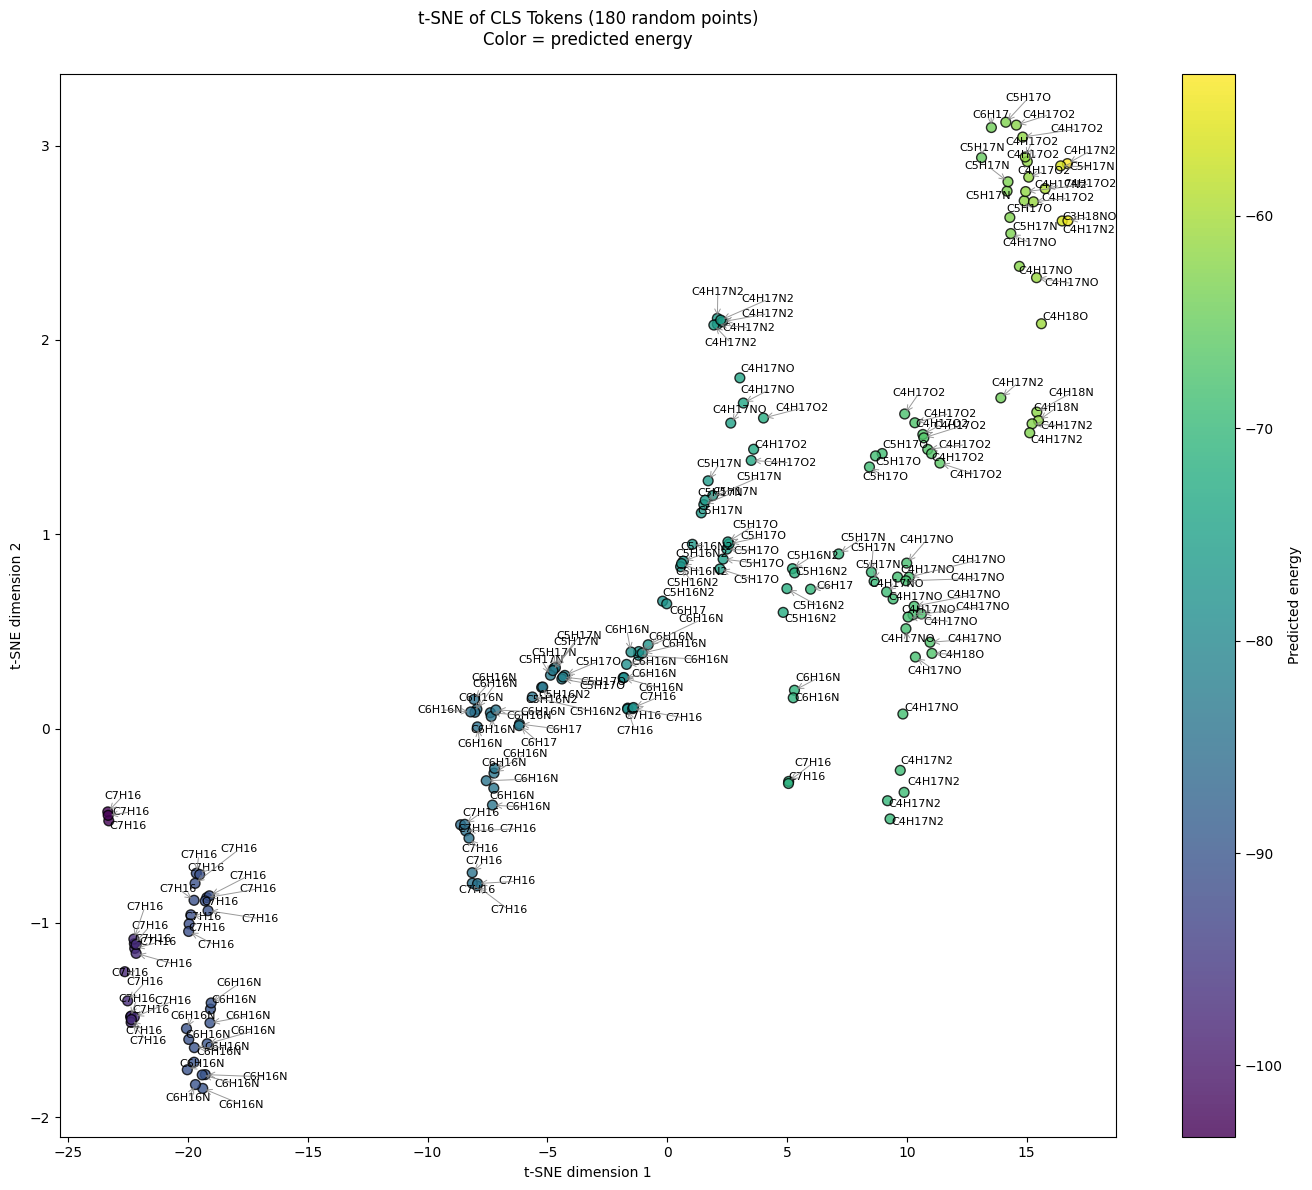

In [19]:
plot_tsne_cls_tokens(CLS_Tokens_Train, Energies_Train, Formulas_Train, num_points=180, random_state=42)

# Prooving the invariance of the model

## Translation Invariance


=== Translation Invariance Test Report (23:00:09 2025-06-29) ===
Molecule ID: 5317

+-----------------------------------+---------------+
|              Metric               |     Value     |
+-----------------------------------+---------------+
| Predicted Energy (Not Translated) | -76.030891 eV |
|   Predicted Energy (Translated)   | -76.030891 eV |
|            True Energy            | -76.020737 eV |
|         Energy Difference         |  0.000000 eV  |
|         Invariance Check          |     PASS      |
+-----------------------------------+---------------+

Translation Vector:
+------+------------+
| Axis |   Value    |
+------+------------+
|  X   | 30.806782  |
|  Y   | -17.927547 |
|  Z   |  6.242938  |
+------+------------+

Atom Position Comparison (Part 1: Original Positions):
+----+-----------+-----------+-----------+
|    |   X_old   |   Y_old   |   Z_old   |
+----+-----------+-----------+-----------+
| 1  | -0.417915 | -1.348723 | -2.281501 |
| 2  | -0.521688 | -0.4407

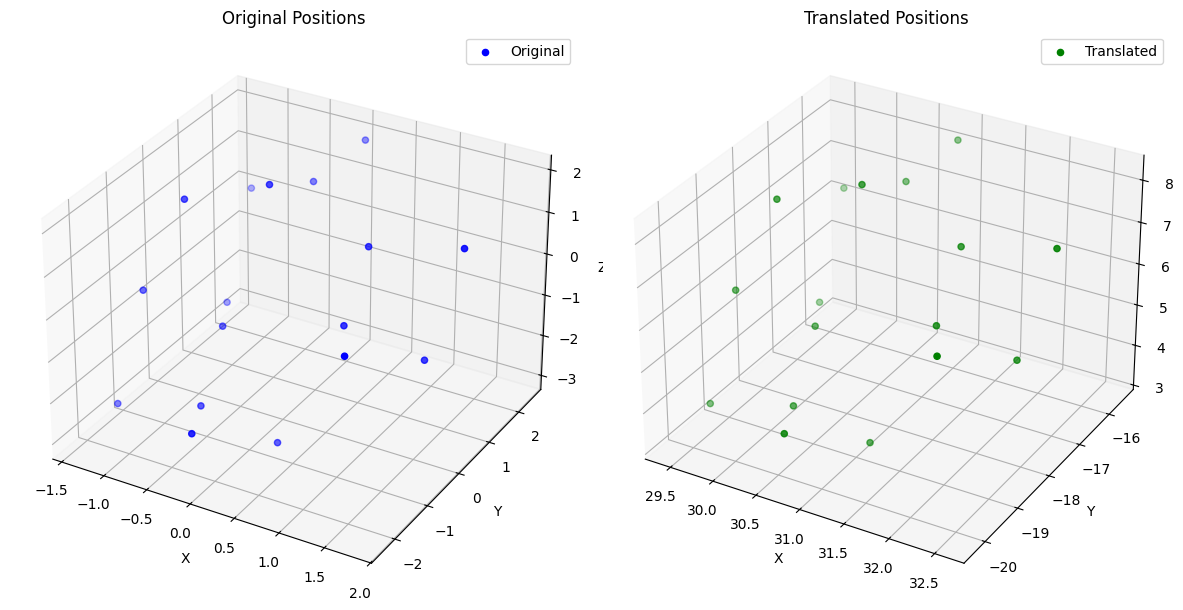


=== End of Report ===


In [20]:


# Test translation invariance on the first molecule in the dataset
index_to_test = np.random.randint(0, len(List_Data_Train))
test_translation_invariance(Model, List_Data_Train, index_to_test, Device, plot_positions=True)

## Rotation Invariance


=== Rotation Invariance Test ===
Molecule ID: 4893
+--------------------------------+---------------+
|             Metric             |     Value     |
+--------------------------------+---------------+
| Predicted Energy (Not Rotated) | -68.292145 eV |
|   Predicted Energy (Rotated)   | -68.292145 eV |
|          True Energy           | -68.051857 eV |
|       Energy Difference        |  0.000000 eV  |
|        Invariance Check        |     PASS      |
+--------------------------------+---------------+

Rotation Applied:
+-------------------+---------------------------------+
|     Parameter     |              Value              |
+-------------------+---------------------------------+
| Point A (X, Y, Z) | (0.565000, 0.773005, -0.202715) |
| Point B (X, Y, Z) | (0.725845, -0.465850, 0.069322) |
|  Axis (u, v, w)   | [0.160844, -1.238855, 0.272037] |
|  Angle (radians)  |            5.395757             |
|  Angle (degrees)  |             309.15              |
+-------------------+-

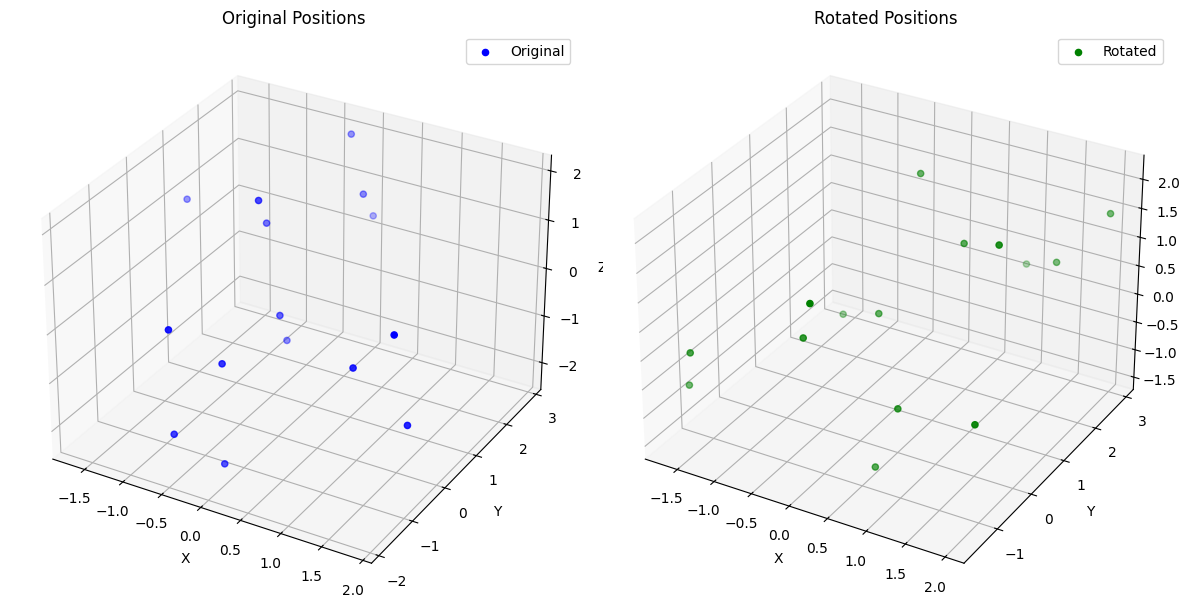


=== End of Test ===


In [21]:

# Test rotation invariance on a random molecule in the dataset
index_to_test = np.random.randint(0, len(List_Data_Train))
test_rotation_invariance(Model, List_Data_Train, index_to_test, Device, plot_positions=True)

## Permutation Invariance


=== Permutation Invariance Test Report (23:00:10 2025-06-29) ===
Molecule ID: 3040

+---------------------------------+---------------+
|             Metric              |     Value     |
+---------------------------------+---------------+
| Predicted Energy (Not Permuted) | -74.531296 eV |
|   Predicted Energy (Permuted)   | -74.531296 eV |
|           True Energy           | -74.513924 eV |
|        Energy Difference        |  0.000000 eV  |
|        Invariance Check         |     PASS      |
+---------------------------------+---------------+

Atom Order Before Permutation:
+-------+--------+
| Index | Symbol |
+-------+--------+
|   0   |   C    |
|   1   |   C    |
|   2   |   C    |
|   3   |   C    |
|   4   |   N    |
|   5   |   O    |
|   6   |   H    |
|   7   |   H    |
|   8   |   H    |
|   9   |   H    |
|  10   |   H    |
|  11   |   H    |
|  12   |   H    |
|  13   |   H    |
|  14   |   H    |
|  15   |   H    |
|  16   |   H    |
+-------+--------+

Atom Order Afte

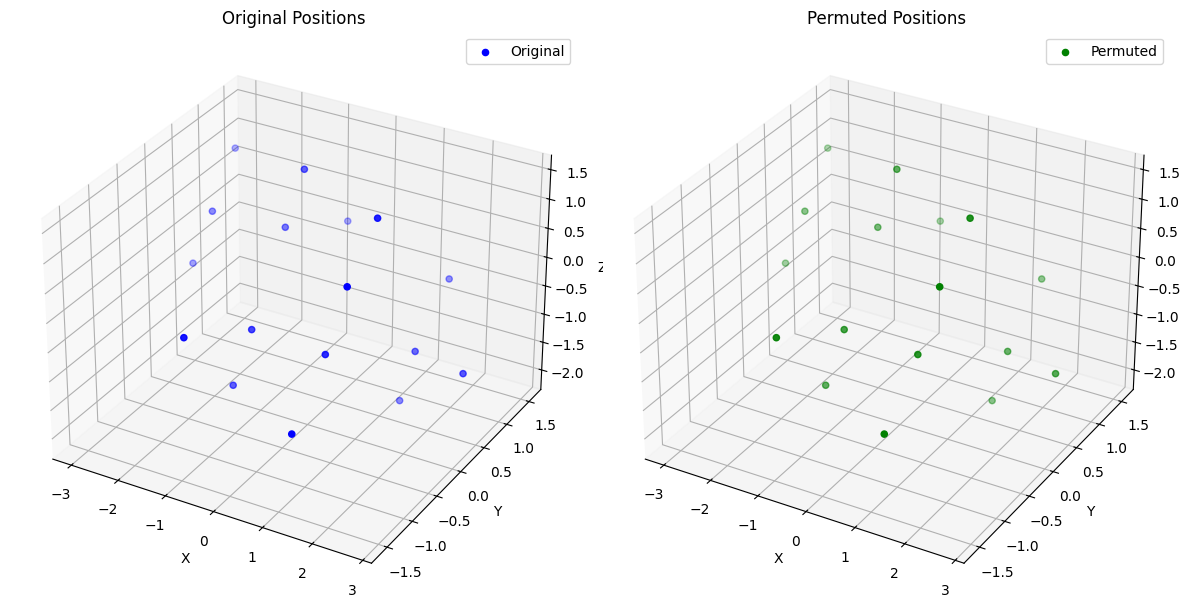


=== End of Report ===


In [22]:

# Test permutation invariance on a random molecule in the dataset
index_to_test = np.random.randint(0, len(List_Data_Train))
test_permutation_invariance(Model, List_Data_Train, index_to_test, Device, plot_positions=True)